# Probability Distribution Function

- Probability distribution shows the probability of each  item from sample space to occur However, in large experiments or continuous variables, it's not feasible to list out all possible outcomes and their probabilities.

- The Probability Distribution Function (PDF) is a mathematical function that describes the likelihood of a random variable taking on particular values.

- Instead of listing out probabilities for each outcome, the PDF gives us a formula or function to calculate probabilities.

- PDF is a mathematicl function b/w X & y where X is all the possible outcomes like 1,2,3,4,5,6 & y is thier probability

# Types of PDF

1. Discrete --> only integers
2. Continous --> all numbers even with decimals

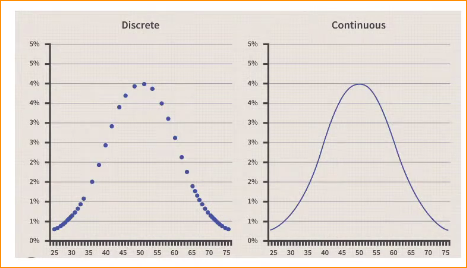

- most common pdf grapsh which exixts in nature
- It means there is a high chance that when when you plot a graph b/w random variable & its probability then most probably it wil look like any of the below
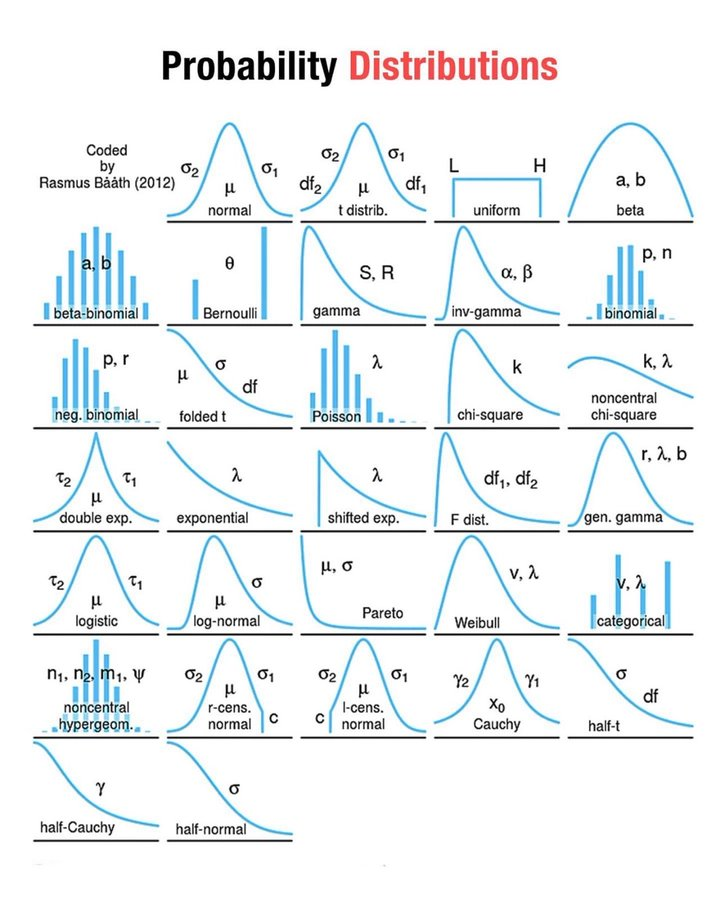

# Whats the importance?

- gives a quick idea about the shape/distribution of data
- like below graph shows the earning of most people, which clearly shows lot of people earn very less & very few earn a lot
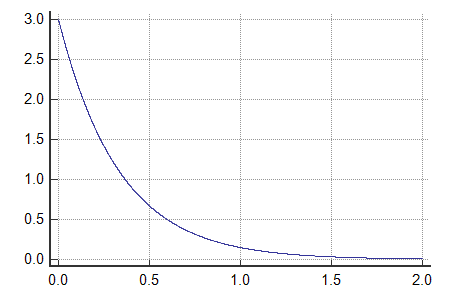
- If distribution graph of your data falls in any of the famous distribution then you'll know a lot about your data automatically
- every probability distribution have a tuning knob "parameters" which changes thier shape, size etc

# Types of Probability Distribution Functions

1. PMF (Probability Mass Function) gives probability for discrete random variables

2. PDF (Probability Density Functions) gives probability for continous random variable

3. CDF (Cumulative Distribution Function) using both

## PMF (Probability Mass Function)

- probability asigned to each value must be non negative
- sum of all probability will be 1

In [26]:
#when rolling 1 dice

import pandas as pd
import random

In [27]:
l = []
for i in range(10000):
    l.append(random.randint(1,6))

In [28]:
len(l)

10000

In [29]:
l[:5]

[5, 5, 2, 1, 5]

In [30]:
pd.Series(l).value_counts()/ pd.Series(l).value_counts().sum()

4    0.1744
5    0.1698
6    0.1677
1    0.1653
3    0.1629
2    0.1599
Name: count, dtype: float64

In [31]:
s = (pd.Series(l).value_counts()/ pd.Series(l).value_counts().sum()).sort_index()

<AxesSubplot:>

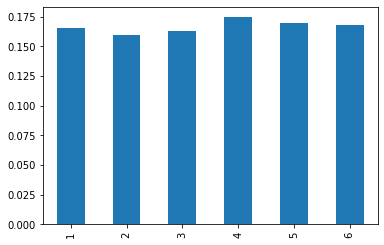

In [32]:
s.plot(kind='bar')

<AxesSubplot:>

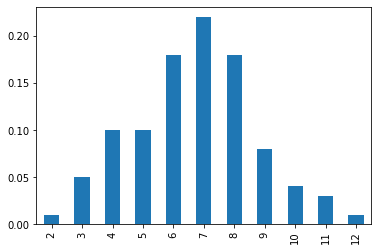

In [34]:
#when rolling 2 dice together

import pandas as pd
import random

l1 = []
for i in range(100):
    a1 = random.randint(1,6)
    b1 = random.randint(1,6)
    l1.append(a1+b1)
    
s1 = (pd.Series(l1).value_counts()/ pd.Series(l1).value_counts().sum()).sort_index()
s1.plot(kind='bar')

## CDF of PMF

- CDF gives the probability that a random variable is less than or equal to a certain value
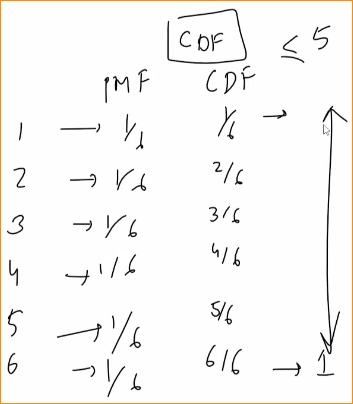

<AxesSubplot:>

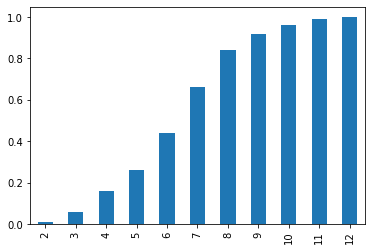

In [36]:
import numpy as np

np.cumsum(s1).plot(kind='bar')

In [38]:
#PMf was telling us the probability of x but CDF tells us all the probability of value <= x

# Probability density function

- PDF is a mathematical function that describes the probability distribution of a "continous random variable"
- whereas PMF describes probability distribution of a "discrete random variable"
- In PMF, y-axis hold probability but in PDF, Its Probability Density

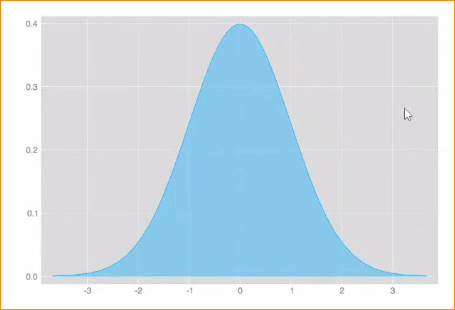

## Why Probability density & not Probability?

- Since x-axis holds continous value which also means it holds infinite values
- Probability for any infinite value will be very close to 0 thats why y-axis doesnt have probability instead it has probability density

## what does the area (in blue) of graph above represents?

- It encompasses the total likelihood of all conceivable outcomes.
- "Probability Density" denotes the probability that a value falls within a given range of numbers.
- In order to calculate: lets say betrween 8 & 9, so we cut that area
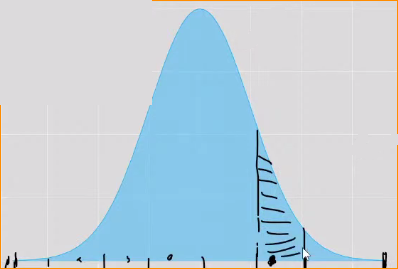
- calculate area.. which tells us..? if complete area is telling us probability between 0 to 10 then this area tell us probability between 8 to 9
- apply integration & find probability between 8 & 9
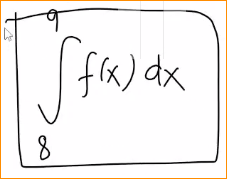
- if we can get the probability between 8 & 9, we can cut even smaller area to get probability between 8 to 8.01 or 8 to 8.0001
- so we can roughly predict the probability of each point
- which actually not probability of that point bu the probability between 2 points but since the difference between 2 points is very small so can consider it similar
- 

## How to calculate graph of PDF

- PMF graph was easy.. we were calculating probabilities & plotting it on y-axis
- PDF doesnt have probabilities instead it has probability density
- In order to plot PDF from a given data, we have to do "Density Estimation"

## Density Estimation

- Its used to estimate the PDF of a random variable
- There are 2 methods of density estimation: 
    1. parametric --> This approach assumes that data data follows a specific probability distribution like normal, uniform, log-normal etc
    2. non-parametric --> This approach doesnt make any assumption instead it directly estimate from data  
- commonly used techniques for density estimation are kernel density estimtion(KDE), histogram estimation, gaussian mixture model(GMM)
- choice of method depens on characteritics of data & intended use of density estimtion
- we have a data which is continous random variable.. so we have to make PDF but in order to draw PDF we need y-axis value which is probability density, so we'll use density estimation.. density estimation also have 2 techniques parametric (where we assum how data looks like) & non-parametric (where we dont assume, we estimate direclty from data)

## Parametric density estimation

- In Parametric density estimation, we assume how our data looks like normal, binomial etc
- for example: we have CGPA of 1000 students & we want to plot PDF, since it continous random variable so we need density estimation, In order to get density estimation we can use parametric or non-parametric, In parametric, we plot histogram on the data & by looking at data, we'll get an idea how data looks like.. lets say it looks like "Normal Distribution"

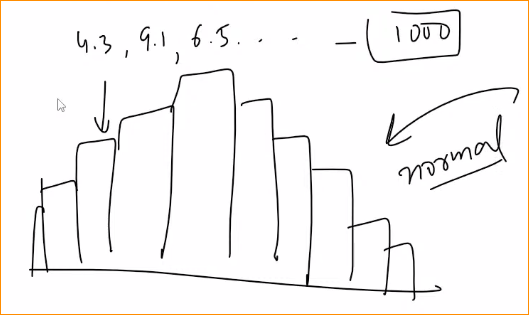

- Once we get an idea how our data looks like, we'll follow that distribution
- In order to draw PDF of normal distribution we need mean & std which is a sample mean & sample std
- Try to estimate population mean & std
- then we can put it in normal distribution pdf equation & we'll get probability density & which we can plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [8]:
#we're specifically generating normally distribued data
#so we already know that our data is normally distributed
sample = normal(loc=50, scale=5, size=1000)

In [9]:
sample.mean()

49.73048029754684

In [10]:
sample.std()

4.991364724166247

In [11]:
# mean & std is not exactly same bcoz its sample data & above is population mean & std

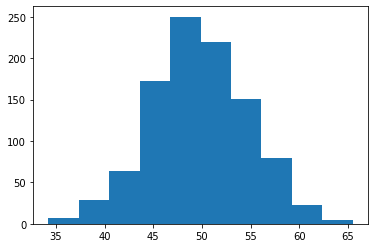

In [14]:
#plot histogram to understand data distribution
plt.hist(sample, bins=10)
plt.show()

In [15]:
#it looks like somewhat normal

In [16]:
#calculate sample mean & sample std
sample_mean = sample.mean()
sample_std = sample.std()

In [17]:
#fit the distribution with above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [18]:
#generating 100 values between min & max of my sample data which will b "x" to be used in pdf equation
values = np.linspace(sample.min(), sample.max(),100)

In [20]:
#sending x 1 by 1 to calculate probability density 
probabilities = [dist.pdf(value) for value in values]

In [21]:
probabilities

[0.0006433354068960486,
 0.0007814083029604666,
 0.0009453248025138907,
 0.0011390598587610638,
 0.0013670188575274631,
 0.001634048442601674,
 0.0019454398731274815,
 0.00230692333374175,
 0.002724651582902664,
 0.0032051713389759247,
 0.003755380876087626,
 0.004382472440622332,
 0.005093858311279036,
 0.005897079615585323,
 0.006799697385980267,
 0.007809165788213497,
 0.008932687979532459,
 0.010177055645681436,
 0.011548473911700441,
 0.013052374005254103,
 0.014693216752041076,
 0.01647429067633508,
 0.018397509138417985,
 0.020463211534895717,
 0.022669974086823752,
 0.025014436113550604,
 0.02749114790816079,
 0.030092446367424447,
 0.032808364363999414,
 0.03562657946620383,
 0.03853240700342757,
 0.04150884164424023,
 0.04453665060994812,
 0.04759452040900708,
 0.050659257577297,
 0.0537060423849647,
 0.05670873286962583,
 0.059640214932059656,
 0.06247279264261958,
 0.06517861141520392,
 0.06773010537125797,
 0.07010045909634362,
 0.07226407313797438,
 0.07419702204895363,
 

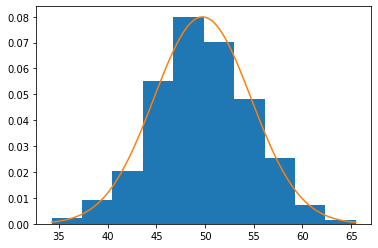

In [25]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

C:\Users\iampr\AppData\Local\Temp\ipykernel_1520\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:ylabel='Density'>

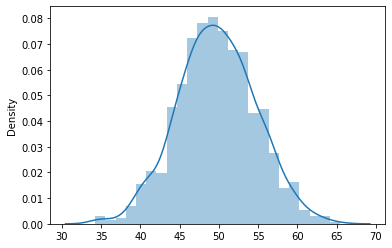

In [27]:
import seaborn as sns
sns.distplot(sample)

In [28]:
#this method is called parametric bcoz it uses 2 parameters --> mean & std to calculate probability density 
#if we change the value of mean & std then graph will also change its shape

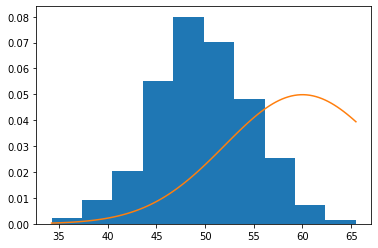

In [38]:
dist1 = norm(60, 8)
values1 = np.linspace(sample.min(), sample.max(),100)
probabilities1 = [dist1.pdf(value) for value in values1]
plt.hist(sample, bins=10, density=True)
plt.plot(values1, probabilities1)

## Non-Parametric density estimation

- Sometimes data is not following any distribution, so we cant use parametric
- This method involves constructing an estimate of PDF using available data points
- Unlike parametric method where we have used mean & std of data
- We use Kernel Density Estimation
- The advantage here is that it doesnt require any assumption of specific distribution which makes it easier to use for any type data
- Its computationally difficult & require more data to achieve accurate estimates

## KDE

- Kernel density estimation (KDE) is a technique used in statistics and machine learning to estimate the probability density function (PDF) of a dataset.
- Imagine you have a set of data points representing the heights of people in a population. Kernel density estimation works by placing a "kernel" (probability distribution, mostly normal distribution) considering that point as middle point of normal distribution - on each data point and calculate probability density by adding both points density on y-axis
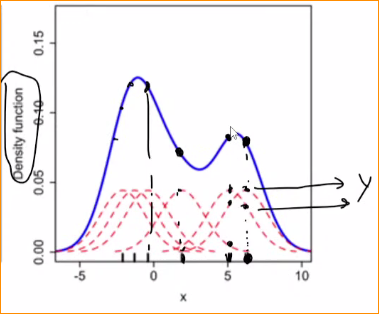
- In Normal distribution, we need 2 parameters.. mean which is the point itself but what is "std".. how thick or thin the shape would be depends upon std !!
- In KDE, STD is Bandwidth, If we asign a very less value then it will have peakedness bcoz y will increase
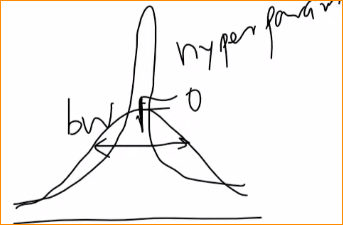
- If we increase the value of bandwidth, y will reduce so shape will spread out
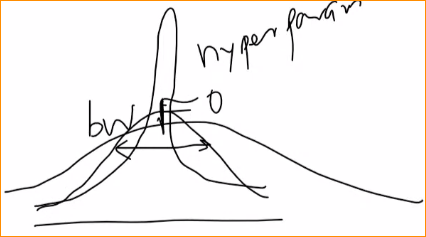

## Why not average & why sum?

- In kernel density estimation (KDE), we don't take the average of the densities because we're interested in estimating the underlying probability density function (PDF) of the data. The goal is to create a smooth representation of how the data is distributed.

- By summing the densities of the kernels placed on each data point, we're effectively capturing the contribution of each individual data point to the overall density estimation. This allows us to model the variability and spread of the data accurately.

- Taking the average would not adequately capture the shape and spread of the data. Averaging the densities would flatten out the resulting curve and could potentially distort the true distribution of the data. Instead, by summing the densities, we preserve the relative contributions of each data point to the overall density estimation, resulting in a more accurate representation of the underlying PDF.

In [39]:
#generate sample data
sample1 = normal(loc=20, scale = 5, size = 300)
sample2 = normal(loc=40, scale = 5, size = 700)
sample = np.hstack((sample1,sample2))

In [40]:
sample

array([20.33727281, 20.89352706, 21.60827056, 13.31104928, 22.37325594,
       23.54459755, 23.87357835, 21.56190114, 14.17268391, 21.66176693,
       26.3804438 , 22.06371532, 26.98036149, 11.31286104, 19.90970816,
       21.08383935, 19.48751647, 15.22259481, 20.28967856, 15.26507178,
       17.31935634, 12.21306623, 23.1513612 , 13.79109494, 23.21167416,
       16.82258829, 18.09357506, 16.93148692, 27.58565724, 22.02637172,
       15.5541701 , 16.92424688, 14.80117957, 18.52672087, 24.1944709 ,
       18.17334549, 22.95256406, 25.13065105, 12.39530627, 19.10185701,
       14.33498591, 21.67723115, 15.24787548, 25.52641497, 15.00052586,
       23.70783418, 12.88975539, 19.01443042, 21.44152633, 32.13113953,
       21.63008572, 17.23961727, 30.7397991 , 21.75184878, 19.65972342,
       18.91548164, 24.39350679, 32.51646309, 26.39089709, 18.15173519,
       18.91800717, 31.24607355, 15.20241959, 31.31798541, 15.48468278,
       22.14924714, 18.77787968, 28.903499  , 12.13591309, 29.50

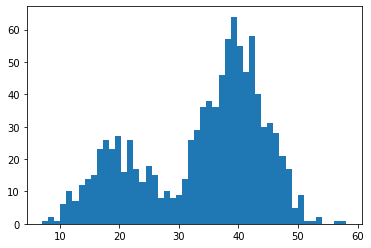

In [42]:
#plot histogram
plt.hist(sample, bins=50)
plt.show()

In [43]:
#since its nt following any distribution so we have to apply non-parametric method to create pdf

In [45]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

#convert data to 2d array bcoz all ml algo works on 2d data
sample = sample.reshape(len(sample),1)

model.fit(sample)

KernelDensity(bandwidth=3)

In [47]:
#generating 100 points between min & max value of data
values = np.linspace(sample.min(), sample.max(),100)

#converting data into 2d
values = values.reshape(len(values),1)

In [48]:
probabilities = model.score_samples(values)

#kde returns log of probability density so converting into exponents
probabilities = np.exp(probabilities)

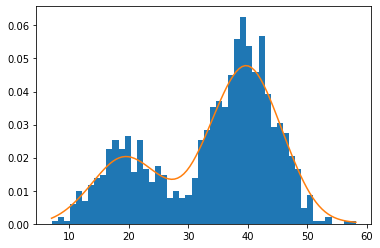

In [50]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

In [51]:
#if we decrease bandwidth then it will peakeds & when we increase it will be smooth
#so we need to do some experiment to get right bandwidth

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:ylabel='Density'>

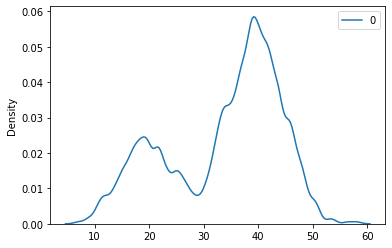

In [60]:
#here you can adjust bw & see the difference
sns.kdeplot(sample,bw_adjust=0.3)

# CDF for PDF

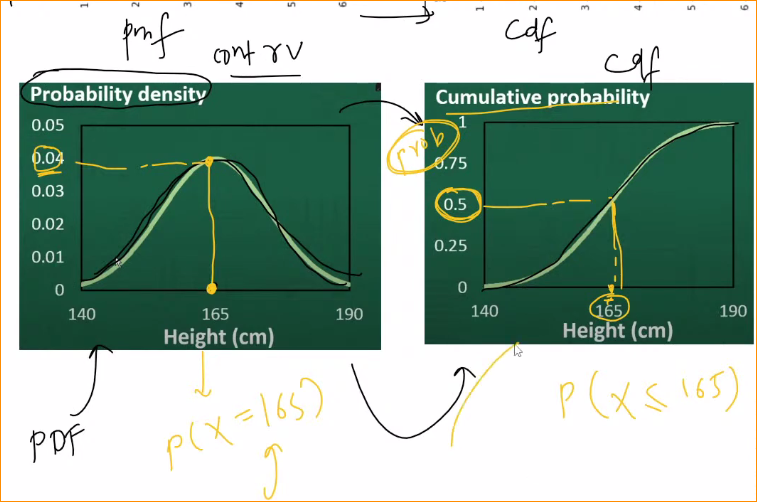

In [61]:
#In PDF we're getting probability density exactly of that point
#In CDF, we're getting probability of values less then equal to that value
#PDF integration will give CDF & CDF differentiation will give PDF

- In probability theory, the relationship between the probability density function (PDF) and the cumulative distribution function (CDF) is based on integration and differentiation.

- PDF (Probability Density Function): This function gives the probability density at each point in the sample space. Integrating the PDF over a range gives the probability of observing a random variable within that range.

- CDF (Cumulative Distribution Function): This function gives the probability that a random variable takes on a value less than or equal to a certain point. It's the cumulative sum of probabilities up to that point.

- The relationship between them is:
- Integrating the PDF over a range gives you the probability (area under the curve) of observing the random variable within that range.
- Differentiating the CDF gives you the PDF.